<a href="https://colab.research.google.com/github/Kanishk877777/ML_Repo/blob/master/ML01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
medical_df = pd.read_csv('insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# New Section

In [ ]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe() #shows the average,min,max of (age bmi children charges)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import matplotlib.pyplot as plt  #we gon use these libraries for data visualization
import seaborn as sns
import plotly.express as px

fig = px.histogram(medical_df, x='age', title='age distribution', nbins=47) # nbins = maxage-minage+1 we need exactly 64 points in x axis
fig.update_layout(bargap=0.5)
fig.show()

In [ ]:
smokercol = medical_df['smoker']
smokercol.value_counts()


,count
smoker,
no,1064
yes,274


In [ ]:
fig=px.histogram(medical_df,x='smoker',color='sex',title='smokers divided by gender')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', title='age vs charges')
fig.show() #here we can see smokers have more medical expense than normal people / age and charges are increasing age inc -> charges inc

In [ ]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',title='bmi vs charges')
fig.show()
#makes no sense bmi is a useless factor it seems for non smokers
#makes sense for smokers as we can assume obese smokers to have more expenses

In [ ]:
corr_coeff1=medical_df.charges.corr(medical_df.age)
 #The correlation coefficient is the specific measure that quantifies the strength of the linear relationship between two variables in a correlation analysis
print(corr_coeff1)

0.2990081933306476


In [ ]:
corr_coeff2=medical_df.charges.corr(medical_df.bmi)
print(corr_coeff2) #rejected

0.19834096883362895


In [ ]:
#corr_coeff3=medical_df.charges.corr(medical_df.smoker)
#print(corr_coeff3) #wont work bcuz we need numeric data for finding correlation

In [ ]:
smoker_conversion={'yes':1,'no':0} #this converts the boolean yes / no into 1 and 0 for the correlation analysis
smoker_numvals=medical_df.smoker.map(smoker_conversion)
print(smoker_numvals)


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64


In [ ]:
#medical_df[smoker]

In [ ]:
corr_coeff4=medical_df.charges.corr(smoker_numvals)
print(corr_coeff4) #now it works **HIGHEST CORR COEFF TILL NOW**

0.787251430498478


greater the value of coeff constant , stronger the relationship
a coeff of value -1 and 1 indicates a perfectly linear relationship

result of .corr is a correlation matrix between the numeric columns of the dataframe

In [ ]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


correlation vs causation fallacy: correlation does not imply causation. Causation means action A causes outcome B. On the other hand, correlation is simply a relationship where action A relates to action B—but one event doesn't necessarily cause the other event to happen.

In [ ]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


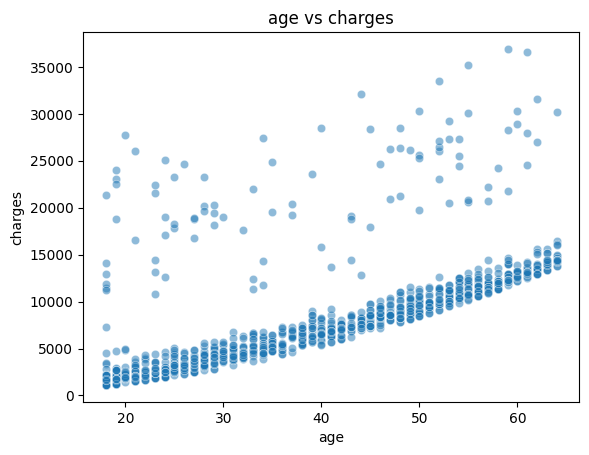

In [ ]:
plt.title('age vs charges')
sns.scatterplot(x='age',y='charges',data=non_smoker_df,alpha=0.5)
plt.show()

now on this non smoker age vs charges data we will apply the linear regression model to generate future trends

y = wx+b  // w->slope , b-> intercept

model

charges = w X age + b



In [ ]:
w = 50
b=100
def estimate_charges(ages,w,b):
  return w*ages+b

In [ ]:
ages=non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges #bad results / predicted results

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker_df.charges #actual results

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'charges')

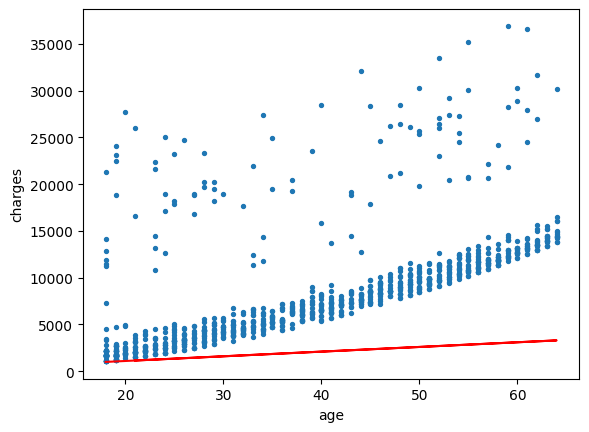

In [ ]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges,'r')
plt.scatter(ages,target,s=8)
plt.xlabel('age')
plt.ylabel('charges')


In [ ]:
def try_params(w,b,ages):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges,'r')
  plt.scatter(ages,target,s=8)
  plt.legend(['estimated','actual'])
  plt.xlabel('age')
  plt.ylabel('charges')

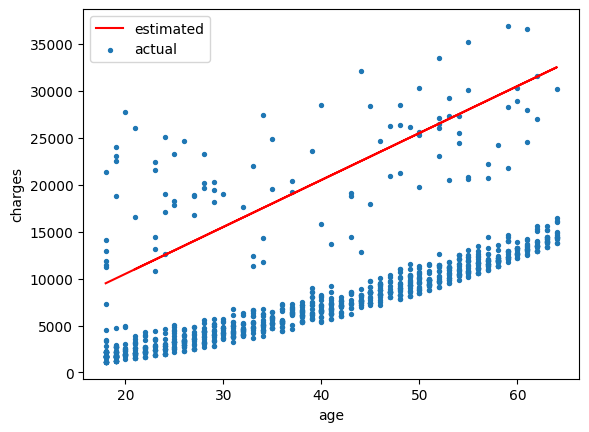

In [ ]:
try_params(500,500,ages)

we are guessing random values of slope and weight which is hard work
therefore we will use the concept of rmse(root mean square error) to compute the difference between actual charges and estimated charges

this demonstrates how off our 'estimates' are compared to actual value
eg - actual = 1700, predicted = 1000
we are clearly off by a lot

In [ ]:
predictions = estimated_charges
actualcharges = non_smoker_df.charges
predictions


,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
actualcharges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
import numpy as np
def rmse(predictions,actualcharges):
  return np.sqrt(np.mean(np.square(actualcharges-predictions)))

rmse(predictions,actualcharges) #this will give us how off our data is its off by approx 8462


np.float64(8461.949562575493)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
help(model.fit)
inputs = non_smoker_df[['age']]
targets=non_smoker_df.charges
model.fit(inputs,targets)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



LinearRegression()

In [ ]:
model.predict(np.array([[30],[45]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5926.04682837, 9934.78052084])

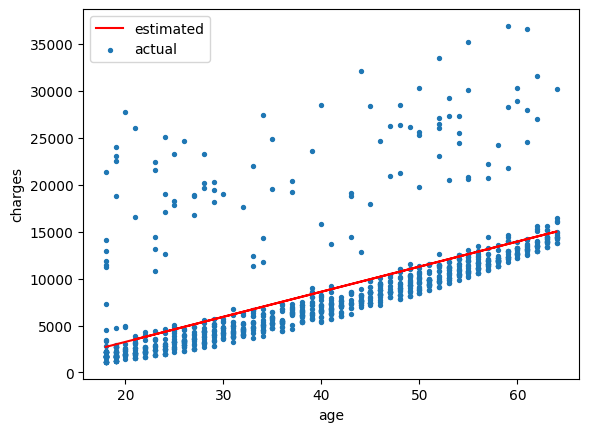

In [ ]:
try_params(model.coef_,model.intercept_,ages)

In [ ]:
predictions = model.predict(inputs)
rmse(predictions,targets)
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
model.predict(np.array([[18]])) #18 saal walo ki prediction h jo smoke nhi karte at 2719 dollars

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2719.0598744])

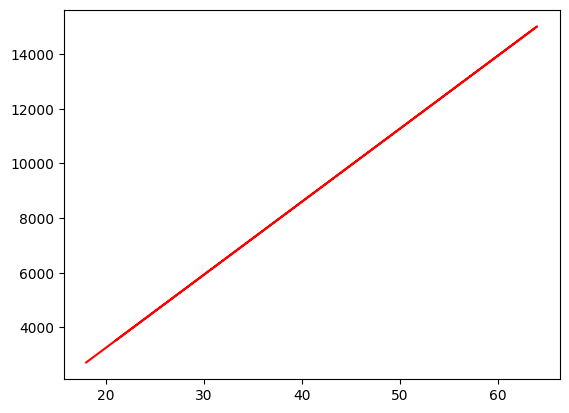

In [ ]:
plt.plot(inputs,predictions,'r')